# Project for the course: Computational Mathematics
## Group 1: Fois Giulia, Manini Nicolas

 ### Analysis concerning random initialization performance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read the summary csv, and the csv containing the execution logs for each task

In [2]:
DatasetFolder = 'Extra_RRs'
SummaryFile = 'summary.csv'
LogsFolder = 'logs'

summary_path = "{}/{}".format(DatasetFolder, SummaryFile)
logs_path = "{}/{}".format(DatasetFolder, LogsFolder)

In [3]:
dfSum = pd.read_csv(summary_path)
TaskNames = dfSum['InputName']

def getTaskNames(batch, batchidx):
    batch = str(batch)
    batchidx=str(batchidx)
    isTask = lambda x: (x.split('_')[1]==batch) & (x.split('_')[2]==batchidx)
    return list(filter(isTask, TaskNames))

dfSum['Batch'] = dfSum['InputName'].str.split('_').str[1]
dfSum['BatchIndex'] = dfSum['InputName'].str.split('_').str[2]
dfSum['KIndex'] = dfSum['InputName'].str.split('_').str[3]

dfSum['Batch'] = dfSum['Batch'].astype(int)
dfSum['BatchIndex'] = dfSum['BatchIndex'].astype(int)
dfSum['KIndex'] = dfSum['KIndex'].astype(int)

dfSum['TimeIter'] = dfSum['Our_time'].div(dfSum['Our_Iter'])
dfSum['TimeDelta_1Iter'] = dfSum['Svd_time'] - dfSum['TimeIter']
dfSum['ConvenientIters'] = np.floor(dfSum['Svd_time'] .div(dfSum['TimeIter']))

Batches = (dfSum['Batch'].unique())
Batches.sort()


dfSum['Kind'] = 0
dfSum.loc[dfSum.TargetRk == dfSum.InputM/2, 'Kind'] = 1
dfSum.loc[dfSum.TargetRk == dfSum.InputM -1, 'Kind'] = 2

In [4]:
import os

allCSVs = list(filter(lambda x:x.endswith(".csv"), os.listdir(logs_path)))
rrsCSVs = list(filter(lambda x:x.startswith("rrs"), allCSVs))
sumsCSVs = list(set(allCSVs) - set(rrsCSVs))

sumsLogs = {}
rrsLogs = {}

# Read all execution logs
for filename in filter(lambda x:x.endswith(".csv"), os.listdir(logs_path)):
    fn = os.path.splitext(filename)[0]
    if filename in sumsCSVs:
        name = fn[5:]
    elif filename in rrsCSVs:
        name = fn[4:]
    else:
        name = ""
    
    dfTemp = pd.read_csv("{}/{}".format(logs_path, filename))
    
    if filename in sumsCSVs:
        dfTemp['ErrorRatio'] = (abs(dfTemp['Error'] - dfTemp['Error'].shift(1))).div(dfTemp['Error'].shift(1))
        sumsLogs[name] = dfTemp
    elif filename in rrsCSVs:
        rrsLogs[name] = dfTemp

In [5]:
rrcols = []
rrdiffcols = []

# Take the RR values
for i in range(1,11):
    colname = "Our_delta{}".format(i)
    dfSum[colname] = dfSum["InputName"].apply(lambda x: min(rrsLogs[x]['RRErrors'][:i]))
    colnamediff = "Delta_diff{}".format(i)
    dfSum[colnamediff] = np.abs(dfSum.Opt_delta - dfSum[colname])
    
    rrcols.append(colname)
    rrdiffcols.append(colnamediff)

In [6]:
dfSum

,InputName,InputM,InputN,InputRk,TargetRk,Opt_delta,Our_delta,Delta_diff,Svd_time,Our_time,...,Our_delta6,Delta_diff6,Our_delta7,Delta_diff7,Our_delta8,Delta_diff8,Our_delta9,Delta_diff9,Our_delta10,Delta_diff10
0,rnd_1_1_1,50,50,50,2,0.945356,0.945383,2.642421e-05,0.001317,0.679538,...,0.945383,2.642421e-05,0.945383,2.642421e-05,0.945383,2.642421e-05,0.945383,2.642421e-05,0.945383,2.642421e-05
1,rnd_1_1_2,50,50,50,25,0.369564,0.369577,1.248765e-05,0.001317,2.120022,...,0.369577,1.248765e-05,0.369577,1.248765e-05,0.369577,1.248765e-05,0.369577,1.248765e-05,0.369577,1.248765e-05
2,rnd_1_1_3,50,50,50,49,0.020134,0.020134,2.387754e-08,0.001317,0.756114,...,0.020134,2.387754e-08,0.020134,2.387754e-08,0.020134,2.387754e-08,0.020134,2.387754e-08,0.020134,2.387754e-08
3,rnd_1_2_1,50,50,50,2,0.936674,0.936687,1.320069e-05,0.000627,0.822190,...,0.936690,1.522768e-05,0.936690,1.522768e-05,0.936690,1.522768e-05,0.936687,1.320069e-05,0.936687,1.320069e-05
4,rnd_1_2_2,50,50,50,25,0.358346,0.358349,2.471825e-06,0.000627,1.153400,...,0.358349,2.471825e-06,0.358349,2.471825e-06,0.358349,2.471825e-06,0.358349,2.471825e-06,0.358349,2.471825e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,rnd_8_2_2,400,400,400,200,0.367147,0.367158,1.034372e-05,0.030583,396.913055,...,0.367158,1.034372e-05,0.367158,1.034372e-05,0.367158,1.034372e-05,0.367158,1.034372e-05,0.367158,1.034372e-05
68,rnd_8_2_3,400,400,400,399,0.000118,0.000118,9.691618e-12,0.030583,48.305766,...,0.000118,9.691618e-12,0.000118,9.691618e-12,0.000118,9.691618e-12,0.000118,9.691618e-12,0.000118,9.691618e-12
69,rnd_8_3_1,400,400,400,2,0.992352,0.992388,3.583783e-05,0.024825,14.791129,...,0.992388,3.583783e-05,0.992388,3.583783e-05,0.992388,3.583783e-05,0.992388,3.583783e-05,0.992388,3.583783e-05
70,rnd_8_3_2,400,400,400,200,0.354427,0.354434,6.635661e-06,0.024825,340.824065,...,0.354434,6.635661e-06,0.354434,6.635661e-06,0.354434,6.635661e-06,0.354434,6.635661e-06,0.354434,6.635661e-06


### Plots

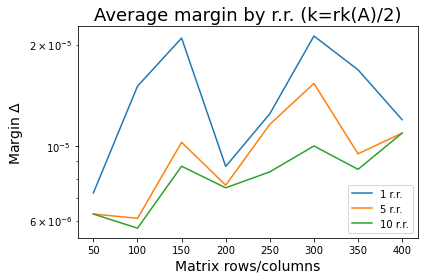

In [7]:
dfTmp = dfSum[dfSum.InputM == 2*dfSum.TargetRk][['Batch', 'InputM', 'TargetRk', 'Opt_delta'] + rrcols + rrdiffcols]
#dfTmp = dfSum[2 == dfSum.TargetRk][['Batch', 'InputM', 'TargetRk', 'Opt_delta'] + rrcols + rrdiffcols]
#dfTmp = dfSum[dfSum.InputM == 1+dfSum.TargetRk][['Batch', 'InputM', 'TargetRk', 'Opt_delta'] + rrcols + rrdiffcols]
dfGrouped = dfTmp.groupby(['Batch']).mean()

rrsPlot = [1,5,10]

plt.yscale('log')

for rr in rrsPlot:
    idx = rr -1
    
    xax = dfGrouped.InputM
    yax = dfGrouped[rrdiffcols[idx]]
    
    plt.plot(xax, yax, label="{} r.r.".format(rr))

    
plt.title("Average margin by r.r. (k=rk(A)/2)", fontsize=18)
plt.xlabel("Matrix rows/columns", fontsize=14)
plt.ylabel(r'Margin $\Delta$', fontsize=14)
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('extra_rr_size_rkhalf.png', format='png', dpi=300)
plt.show()

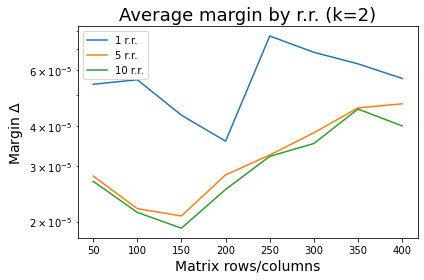

In [8]:
#dfTmp = dfSum[dfSum.InputM == 2*dfSum.TargetRk][['Batch', 'InputM', 'TargetRk', 'Opt_delta'] + rrcols + rrdiffcols]
dfTmp = dfSum[2 == dfSum.TargetRk][['Batch', 'InputM', 'TargetRk', 'Opt_delta'] + rrcols + rrdiffcols]
#dfTmp = dfSum[dfSum.InputM == 1+dfSum.TargetRk][['Batch', 'InputM', 'TargetRk', 'Opt_delta'] + rrcols + rrdiffcols]
dfGrouped = dfTmp.groupby(['Batch']).mean()

rrsPlot = [1,5,10]

plt.yscale('log')

for rr in rrsPlot:
    idx = rr -1
    
    xax = dfGrouped.InputM
    yax = dfGrouped[rrdiffcols[idx]]
    
    plt.plot(xax, yax, label="{} r.r.".format(rr))

    
plt.title("Average margin by r.r. (k=2)", fontsize=18)
plt.xlabel("Matrix rows/columns", fontsize=14)
plt.ylabel(r'Margin $\Delta$', fontsize=14)
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('extra_rr_size_rk2.png', format='png', dpi=300)
plt.show()

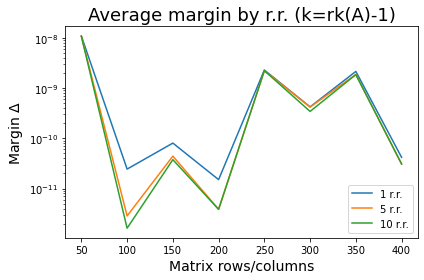

In [9]:
#dfTmp = dfSum[dfSum.InputM == 2*dfSum.TargetRk][['Batch', 'InputM', 'TargetRk', 'Opt_delta'] + rrcols + rrdiffcols]
#dfTmp = dfSum[2 == dfSum.TargetRk][['Batch', 'InputM', 'TargetRk', 'Opt_delta'] + rrcols + rrdiffcols]
dfTmp = dfSum[dfSum.InputM == 1+dfSum.TargetRk][['Batch', 'InputM', 'TargetRk', 'Opt_delta'] + rrcols + rrdiffcols]
dfGrouped = dfTmp.groupby(['Batch']).mean()

rrsPlot = [1,5,10]

plt.yscale('log')

for rr in rrsPlot:
    idx = rr -1
    
    xax = dfGrouped.InputM
    yax = dfGrouped[rrdiffcols[idx]]
    
    plt.plot(xax, yax, label="{} r.r.".format(rr))

    
plt.title("Average margin by r.r. (k=rk(A)-1)", fontsize=18)
plt.xlabel("Matrix rows/columns", fontsize=14)
plt.ylabel(r'Margin $\Delta$', fontsize=14)
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('extra_rr_size_rk-1.png', format='png', dpi=300)
plt.show()

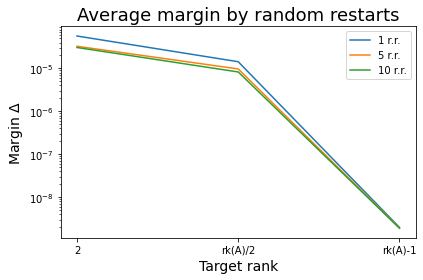

In [10]:
dfTmp = dfSum[['InputM', 'Kind', 'Opt_delta'] + rrcols + rrdiffcols]
dfGrouped = dfTmp.groupby(['Kind']).mean()
#dfGrouped = dfTmp[dfTmp.InputM == 50].groupby(['Kind']).mean()

rrsPlot = [1,5,10]

plt.yscale('log')

for rr in rrsPlot:
    idx = rr -1
    
    xax = ['2', 'rk(A)/2', 'rk(A)-1']
    yax = dfGrouped[rrdiffcols[idx]]
    
    plt.plot(xax, yax, label="{} r.r.".format(rr))

    
plt.title("Average margin by random restarts", fontsize=18)
plt.xlabel("Target rank", fontsize=14)
plt.ylabel(r'Margin $\Delta$', fontsize=14)
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('extra_rr_rank.png', format='png', dpi=300)
plt.show()